<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

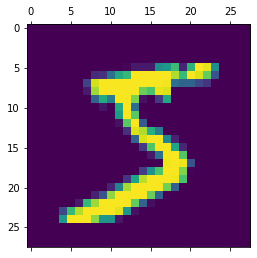

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
   1/1875 [..............................] - ETA: 0s - loss: 2.2880 - accuracy: 0.0625WARNING:tensorflow:From C:\Users\dhava\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 1s 579us/step - loss: 0.2877 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 1s 555us/step - loss: 0.1335 - accuracy: 0.9610
Epoch 3/5
1875/1875 [==============================] - 1s 558us/step - loss: 0.0937 - accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 1s 561us/step - loss: 0.0726 - accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 1s 562us/step - loss: 0.0602 - accuracy: 0.9816


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [17]:
model.get_weights()

[array([[ 0.03710166, -0.02226494, -0.02786753, ...,  0.04757313,
          0.02058867, -0.04950789],
        [ 0.07455616, -0.03182944,  0.05833508, ..., -0.03961401,
          0.02892359,  0.02340069],
        [-0.0543641 , -0.04441314,  0.02836586, ...,  0.01674826,
          0.0317898 ,  0.04865049],
        ...,
        [ 0.02159516, -0.02288916, -0.06628822, ...,  0.07597399,
         -0.00850931,  0.00492705],
        [-0.00703691,  0.06034224,  0.05673611, ..., -0.00163601,
          0.06579061, -0.01760536],
        [-0.0814729 , -0.01366603, -0.07882639, ..., -0.06862259,
         -0.01236068, -0.07372223]], dtype=float32),
 array([-0.07026396, -0.02126275,  0.11320353, -0.06509541,  0.16488701,
        -0.04345541,  0.02846033, -0.02016422, -0.04591657, -0.0041195 ,
         0.04153765,  0.03212705,  0.00966279,  0.09190349, -0.04183901,
         0.06425156,  0.0857133 ,  0.02521947,  0.01778945, -0.01413164,
         0.09179094,  0.12134763, -0.01173496,  0.12008779,  0.041